#### Code reference for this section is from:
* https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/labs/code-demos/API-wikipedia/wikipedia-api.html
* https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/labs/code-demos/API-newapi/news-api.html


In [1]:
API_KEY='481b1e4a75874d2f9a23e3329031364c'

In [2]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

### Topic : Electric Vehicles


In [3]:
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

# THIS CODE WILL NOT WORK UNLESS YOU INSERT YOUR API KEY IN THE NEXT LINE
API_KEY='481b1e4a75874d2f9a23e3329031364c'
TOPIC1='electric vehicles'

In [4]:
URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC1,
            'sortBy': 'relevancy',
            'totalRequests': 1}

print(baseURL)
# print(URLpost)

#GET DATA FROM API
response = requests.get(baseURL, URLpost) #request data from the server
# print(response.url);  
response = response.json() #extract txt data from request into json

# PRETTY PRINT
# https://www.digitalocean.com/community/tutorials/python-pretty-print-json

print(json.dumps(response, indent=2))

# #GET TIMESTAMP FOR PULL REQUEST
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

# SAVE TO FILE 
with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

https://newsapi.org/v2/everything?
{
  "status": "ok",
  "totalResults": 7432,
  "articles": [
    {
      "source": {
        "id": "the-verge",
        "name": "The Verge"
      },
      "author": "Andrew J. Hawkins",
      "title": "Google wants to be at the center of all your climate change decisions",
      "description": "Google is rolling out a host of new updates aimed at helping people buy electric vehicles and heat pumps, and cities better plan for climate disasters.",
      "url": "https://www.theverge.com/2023/10/10/23906496/google-ai-transportation-ev-heat-pump-flood-wildfire",
      "urlToImage": "https://cdn.vox-cdn.com/thumbor/EaScurH_lVme4X1artA78Qh3lpo=/0x0:2040x1360/1200x628/filters:focal(1020x680:1021x681)/cdn.vox-cdn.com/uploads/chorus_asset/file/24016888/STK093_Google_01.jpg",
      "publishedAt": "2023-10-10T11:00:00Z",
      "content": "Google wants to be at the center of all your climate change decisions\r\nGoogle wants to be at the center of all your climate c

In [5]:
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

In [6]:
article_list=response['articles']   #list of dictionaries for each article
article_keys=article_list[0].keys()
print("AVAILABLE KEYS:")
print(article_keys)
index=0
electric_vehicle_cleaned_data=[];  
for article in article_list:
    tmp=[]
    if(verbose):
        print("#------------------------------------------")
        print("#",index)
        print("#------------------------------------------")

    for key in article_keys:
        if(verbose):
            print("----------------")
            print(key)
            print(article[key])
            print("----------------")

        if(key=='source'):
            src=string_cleaner(article[key]['name'])
            tmp.append(src) 

        if(key=='author'):
            author=string_cleaner(article[key])
            #ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            if(src in author): 
                print(" AUTHOR ERROR:",author);author='NA'
            tmp.append(author)

        if(key=='title'):
            tmp.append(string_cleaner(article[key]))

        # if(key=='description'):
        #     tmp.append(string_cleaner(article[key]))

        # if(key=='content'):
        #     tmp.append(string_cleaner(article[key]))

        if(key=='publishedAt'):
            #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date=article[key]
            if(not ref.match(date)):
                print(" DATE ERROR:",date); date="NA"
            tmp.append(date)

    electric_vehicle_cleaned_data.append(tmp)
    index+=1

AVAILABLE KEYS:
dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
#------------------------------------------
# 0
#------------------------------------------
----------------
source
{'id': 'the-verge', 'name': 'The Verge'}
----------------
----------------
author
Andrew J. Hawkins
----------------
----------------
title
Google wants to be at the center of all your climate change decisions
----------------
----------------
description
Google is rolling out a host of new updates aimed at helping people buy electric vehicles and heat pumps, and cities better plan for climate disasters.
----------------
----------------
url
https://www.theverge.com/2023/10/10/23906496/google-ai-transportation-ev-heat-pump-flood-wildfire
----------------
----------------
urlToImage
https://cdn.vox-cdn.com/thumbor/EaScurH_lVme4X1artA78Qh3lpo=/0x0:2040x1360/1200x628/filters:focal(1020x680:1021x681)/cdn.vox-cdn.com/uploads/chorus_asset/file/24016888/STK093_G

In [7]:
df = pd.DataFrame(electric_vehicle_cleaned_data)
print(df)
df.to_csv('electric_vehicle_cleaned.csv', index=False) 
# index_label=['title','src','author','date','description']

                   0                   1  \
0          the verge    andrew j hawkins   
1          the verge         umar shakir   
2           engadget         malak saleh   
3           engadget       will shanklin   
4          the verge         umar shakir   
..               ...                 ...   
95  business insider           tim levin   
96          jalopnik    bradley brownell   
97      yanko design         gaurav sood   
98    theregistercom  brandon vigliarolo   
99          autoblog    associated press   

                                                    2                     3  
0   google wants to be at the center of all your c...  2023-10-10T11:00:00Z  
1   gas station convenience stores might survive t...  2023-10-05T00:28:16Z  
2   honda's adorable '80s microscooter is back and...  2023-09-14T13:00:10Z  
3   honda's first all-electric suv has 300-mile ra...  2023-09-28T18:31:46Z  
4   kias three-row ev9 electric suv will start at ...  2023-09-28T00:26:45Z  
.. 

In [8]:
electric_vehicle_df = pd.read_csv("electric_vehicle_cleaned.csv")
rename_map = {
    '0': 'title',
    '2': 'description'
}

electric_vehicle_df.rename(columns=rename_map, inplace=True)

In [9]:
cols_to_keep = rename_map.values()
electric_vehicle_df = electric_vehicle_df[cols_to_keep]

In [10]:
electric_vehicle_df

,title,description
0,the verge,google wants to be at the center of all your c...
1,the verge,gas station convenience stores might survive t...
2,engadget,honda's adorable '80s microscooter is back and...
3,engadget,honda's first all-electric suv has 300-mile ra...
4,the verge,kias three-row ev9 electric suv will start at ...
...,...,...
95,business insider,i watched youtube in a self-driving mercedes a...
96,jalopnik,more automakers are angry the united kingdom's...
97,yanko design,the future of ev camping gets a reboot with ca...
98,theregistercom,"ford, bmw, honda to steer bidirectional ev cha..."


In [11]:
import wikipedia

In [12]:
ev_text = str(electric_vehicle_df["description"])

In [13]:
print(ev_text)

0     google wants to be at the center of all your c...
1     gas station convenience stores might survive t...
2     honda's adorable '80s microscooter is back and...
3     honda's first all-electric suv has 300-mile ra...
4     kias three-row ev9 electric suv will start at ...
                            ...                        
95    i watched youtube in a self-driving mercedes a...
96    more automakers are angry the united kingdom's...
97    the future of ev camping gets a reboot with ca...
98    ford, bmw, honda to steer bidirectional ev cha...
99    battery plants: 'the make-or-break issue' in t...
Name: description, Length: 100, dtype: object


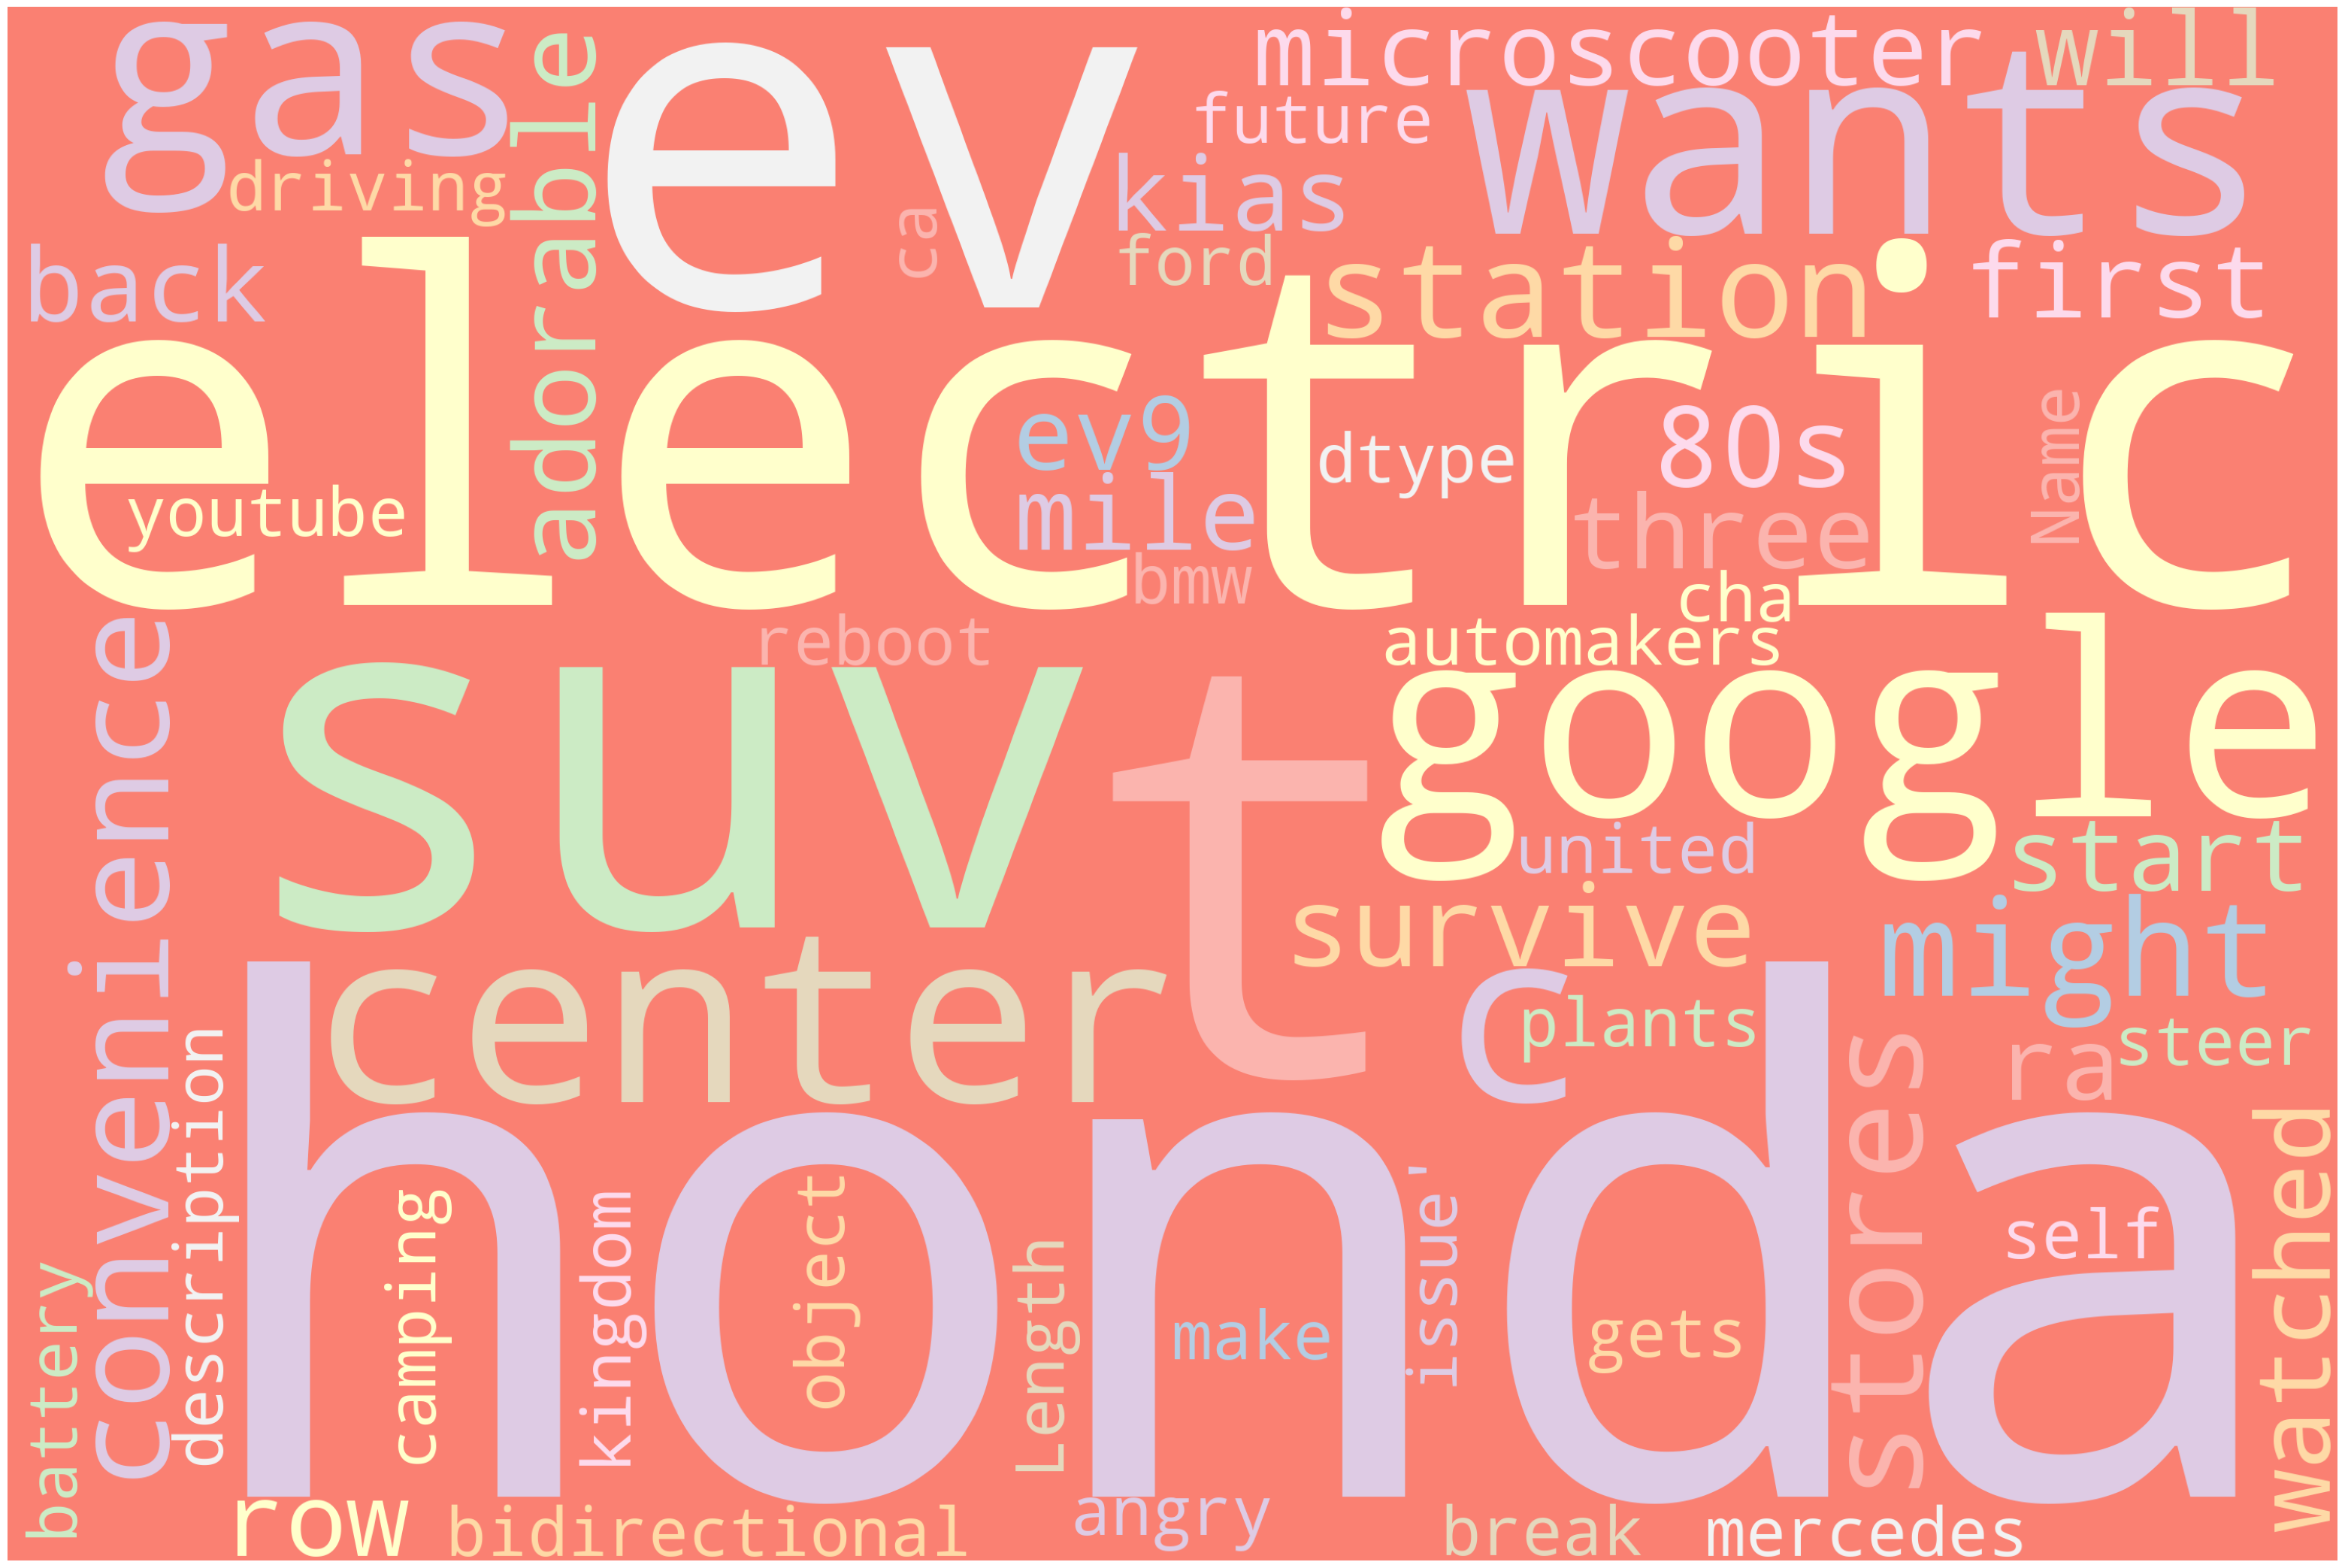

In [14]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

# text='The field of machine learning is typically divided into three fundamental sub-paradigms. These include supervised learning, unsupervised learning, and reinforcement learning (RL). The discipline of reinforcement learning focuses on how intelligent agents learn to perform actions, inside a specified environment, to maximize  a cumulative reward function. Over the past several decades, there has been a push to incorporate concepts from the field of deep-learning into the agents used in RL algorithms. This has spawned the field of Deep reinforcement learning. To date, the field of deep RL has yielded stunning results in a wide range of technological applications. These include, but are not limited to, self-driving cars, autonomous game play, robotics, trading and finance, and Natural Language Processing. This course will begin with an introduction to the fundamentals of traditional, i.e. non-deep, reinforcement learning. After reviewing fundamental deep learning topics the course will transition to deep RL by incorporating artificial neural networks into the models. Topics include Markov Decision Processes, Multi-armed Bandits, Monte Carlo Methods, Temporal Difference Learning, Function Approximation, Deep Neural Networks, Actor-Critic, Deep Q-Learning, Policy Gradient Methods, and connections to Psychology and to Neuroscience.'
generate_word_cloud(ev_text)

### Data from API:

In [20]:
# Code source: https://www.programiz.com/python-programming/json

import json

with open('output.json', 'r') as f:
  data = json.load(f)

str_json = json.dumps(data)

# Getting dictionary
json_dict = json.loads(str_json)

# Pretty Printing JSON string back
data_output = json.dumps(json_dict, indent = 4, sort_keys=True)
print(data_output)

import pandas as pd

# Taking a subset now to test and later cleaning can be performed on the whole file
data_subset = {
    "2020 Census Tract": 53061042003,
    "Base MSRP": 0,
    "City": "Edmonds",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility": "Clean Alternative Fuel Vehicle Eligible",
    "County": "Snohomish",
    "DOL Vehicle ID": 167322298,
    "Electric Range": 124,
    "Electric Utility": "PUGET SOUND ENERGY INC",
    "Electric Vehicle Type": "Battery Electric Vehicle (BEV)",
    "Legislative District": 21,
    "Make": "HYUNDAI",
    "Model": "IONIQ",
    "Model Year": 2019,
    "Postal Code": 98026,
    "State": "WA",
    "VIN (1-10)": "KMHC05LH6K",
    "Vehicle Location": "POINT (-122.33568499999996 47.803720000000055)",
    "_id": "64b8150c3f35c83376286f52"
}

# Create a Pandas DataFrame from the provided JSON data
df = pd.json_normalize(data)

df.rename(columns=lambda x: x.strip(), inplace=True)
df=df.rename(columns = {'_id':'id'})
df=df.rename(columns = {'VIN (1-10)':'VIN'})

# Drop columns that are not needed:
df = df.drop(['Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], axis=1)

# Print the DataFrame
display(df)

[
    {
        "2020 Census Tract": 53061042003,
        "Base MSRP": 0,
        "City": "Edmonds",
        "Clean Alternative Fuel Vehicle (CAFV) Eligibility": "Clean Alternative Fuel Vehicle Eligible",
        "County": "Snohomish",
        "DOL Vehicle ID": 167322298,
        "Electric Range": 124,
        "Electric Utility": "PUGET SOUND ENERGY INC",
        "Electric Vehicle Type": "Battery Electric Vehicle (BEV)",
        "Legislative District": 21,
        "Make": "HYUNDAI",
        "Model": "IONIQ",
        "Model Year": 2019,
        "Postal Code": 98026,
        "State": "WA",
        "VIN (1-10)": "KMHC05LH6K",
        "Vehicle Location": "POINT (-122.33568499999996 47.803720000000055)",
        "_id": "64b8150c3f35c83376286f52"
    },
    {
        "2020 Census Tract": 53061051937,
        "Base MSRP": 0,
        "City": "Bothell",
        "Clean Alternative Fuel Vehicle (CAFV) Eligibility": "Clean Alternative Fuel Vehicle Eligible",
        "County": "Snohomish",
        

,id,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,64b8150c3f35c83376286f52,KMHC05LH6K,Snohomish,Edmonds,WA,98026,2019,HYUNDAI,IONIQ,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,124
1,64b8150c3f35c83376286f2c,5YJYGDEE3L,Snohomish,Bothell,WA,98021,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291
2,64b8150c3f35c83376286f26,1G1RB6S58J,Yakima,Selah,WA,98942,2018,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53
3,64b8150c3f35c83376286f22,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150
4,64b8150c3f35c83376286f75,1G1RA6E41D,Snohomish,Monroe,WA,98272,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38
5,64b8150c3f35c83376286f9a,5YJSA1E25H,Snohomish,Bothell,WA,98021,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210
6,64b8150c3f35c83376286fa5,5YJ3E1EA3J,Yakima,Yakima,WA,98902,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
7,64b8150c3f35c83376286fac,5YJ3E1EAXJ,Island,Oak Harbor,WA,98277,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
8,64b8150c3f35c83376286fb0,WBY1Z8C38H,Yakima,Yakima,WA,98902,2017,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97
9,64b8150c3f35c83376286fb8,5YJ3E1EA6J,Snohomish,Bothell,WA,98012,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
